In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Food Sold dataset
raw = pd.read_csv('Food Sold everyday.csv')
raw.head

<bound method NDFrame.head of            Date Day of the week  Day  Month  Year  Thighs  Tenders  Wings  \
0      3/1/2017       Wednesday    1      3  2017       8       11      7   
1      3/2/2017        Thursday    2      3  2017      11       27     13   
2      3/3/2017          Friday    3      3  2017       9       26     12   
3      3/4/2017        Saturday    4      3  2017       9       17     11   
4      3/5/2017          Sunday    5      3  2017       7        3      8   
...         ...             ...  ...    ...   ...     ...      ...    ...   
2725  8/16/2024          Friday   16      8  2024       7       41     14   
2726  8/17/2024        Saturday   17      8  2024       5       28      8   
2727  8/18/2024          Sunday   18      8  2024       5       10      4   
2728  8/19/2024          Monday   19      8  2024       6       24     11   
2729  8/20/2024         Tuesday   20      8  2024       6        1      9   

      Egg rolls  Crispitos  ...  Quesadilla  

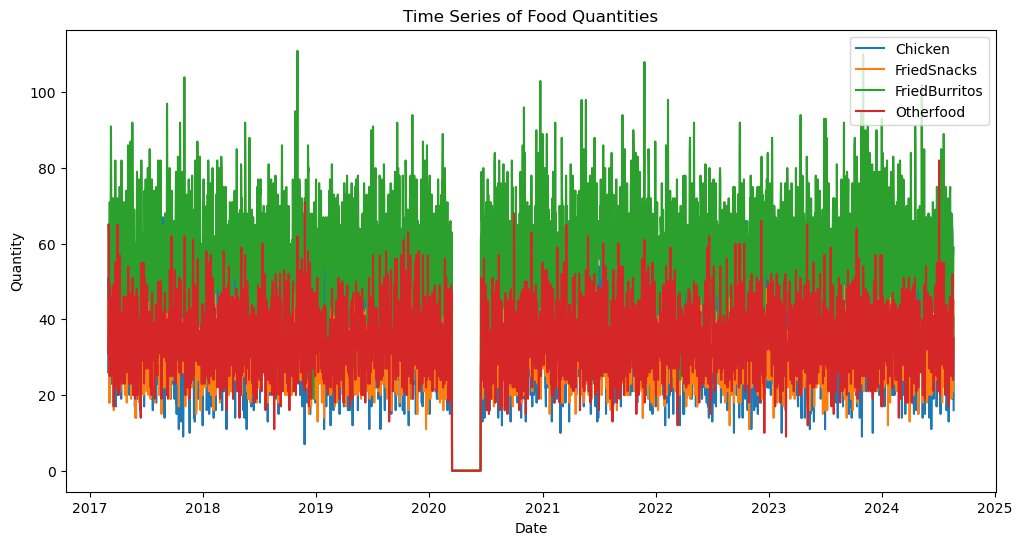

In [133]:
# Assuming you have a DateTime column, you can plot the target variables over time
raw['Date'] = pd.to_datetime(raw['Date'])  # Ensure the Date column is in datetime format

plt.figure(figsize=(12, 6))
plt.plot(raw['Date'], raw['Chicken'], label='Chicken')
plt.plot(raw['Date'], raw['FriedSnacks'], label='FriedSnacks')
plt.plot(raw['Date'], raw['FriedBurritos'], label='FriedBurritos')
plt.plot(raw['Date'], raw['Otherfood'], label='Otherfood')
plt.title('Time Series of Food Quantities')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [28]:
columns = ['Date','Chicken','FriedSnacks','FriedBurritos','Otherfood','Is Holiday','Price_Chicken',
           'Price_FriedSnacks','Price_FriedBurritos','Price_Other_Food']
df = raw[columns]
df

,Date,Chicken,FriedSnacks,FriedBurritos,Otherfood,Is Holiday,Price_Chicken,Price_FriedSnacks,Price_FriedBurritos,Price_Other_Food
0,3/1/2017,26,39,65,31,False,4.99,1.79,2.29,2.48
1,3/2/2017,51,45,63,40,False,4.99,1.79,2.29,2.48
2,3/3/2017,47,44,47,65,False,4.99,1.79,2.29,2.48
3,3/4/2017,37,25,65,47,False,4.99,1.79,2.29,2.48
4,3/5/2017,18,18,43,27,False,4.99,1.79,2.29,2.48
...,...,...,...,...,...,...,...,...,...,...
2725,8/16/2024,62,48,60,52,False,7.99,2.48,2.99,3.49
2726,8/17/2024,41,23,38,36,False,7.99,2.48,2.99,3.49
2727,8/18/2024,19,21,39,24,False,7.99,2.48,2.99,3.49
2728,8/19/2024,41,36,56,26,False,7.99,2.48,2.99,3.49


In [29]:
# 1. Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\3330707552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [30]:
# 2. Set the date as the index (optional but helpful for time series)
df.set_index('Date', inplace=True)

In [31]:
df

,Chicken,FriedSnacks,FriedBurritos,Otherfood,Is Holiday,Price_Chicken,Price_FriedSnacks,Price_FriedBurritos,Price_Other_Food
Date,,,,,,,,,
2017-03-01,26,39,65,31,False,4.99,1.79,2.29,2.48
2017-03-02,51,45,63,40,False,4.99,1.79,2.29,2.48
2017-03-03,47,44,47,65,False,4.99,1.79,2.29,2.48
2017-03-04,37,25,65,47,False,4.99,1.79,2.29,2.48
2017-03-05,18,18,43,27,False,4.99,1.79,2.29,2.48
...,...,...,...,...,...,...,...,...,...
2024-08-16,62,48,60,52,False,7.99,2.48,2.99,3.49
2024-08-17,41,23,38,36,False,7.99,2.48,2.99,3.49
2024-08-18,19,21,39,24,False,7.99,2.48,2.99,3.49


In [32]:
# 3. Handle missing data (for simplicity, filling missing values with median)
df.fillna(df.median(), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\3090981337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(), inplace=True)


In [33]:
# 4. Create additional time-related features
df['Day_of_Week'] = df.index.dayofweek  # Monday = 0, Sunday = 6
df['Month'] = df.index.month  # Month as an integer
df['Weekday'] = np.where(df['Day_of_Week'] < 5, 1, 0)  # Weekday vs Weekend
df['Is_Holiday'] = df['Is Holiday']  # Assuming you already have a holiday flag
df['Is_Weekend'] = np.where(df['Day_of_Week'] >= 5, 1, 0)  # Weekend indicator

C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\969340903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_of_Week'] = df.index.dayofweek  # Monday = 0, Sunday = 6
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\969340903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month  # Month as an integer
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\969340903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [34]:
# 5. Lag features (Previous week's sales)
df['Lag_Chicken_Wings'] = df['Chicken'].shift(7)  # 7-day lag
df['Lag_Breakfast'] = df['FriedSnacks'].shift(7)  # 7-day lag
df['Lag_Fried_Burritos'] = df['FriedBurritos'].shift(7)  # 7-day lag
df['Lag_Other_Food'] = df['Otherfood'].shift(7)  # 7-day lag


C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2124679577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_Chicken_Wings'] = df['Chicken'].shift(7)  # 7-day lag
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2124679577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_Breakfast'] = df['FriedSnacks'].shift(7)  # 7-day lag
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2124679577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [35]:
df

,Chicken,FriedSnacks,FriedBurritos,Otherfood,Is Holiday,Price_Chicken,Price_FriedSnacks,Price_FriedBurritos,Price_Other_Food,Day_of_Week,Month,Weekday,Is_Holiday,Is_Weekend,Lag_Chicken_Wings,Lag_Breakfast,Lag_Fried_Burritos,Lag_Other_Food
Date,,,,,,,,,,,,,,,,,,
2017-03-01,26,39,65,31,False,4.99,1.79,2.29,2.48,2,3,1,False,0,NaN,NaN,NaN,NaN
2017-03-02,51,45,63,40,False,4.99,1.79,2.29,2.48,3,3,1,False,0,NaN,NaN,NaN,NaN
2017-03-03,47,44,47,65,False,4.99,1.79,2.29,2.48,4,3,1,False,0,NaN,NaN,NaN,NaN
2017-03-04,37,25,65,47,False,4.99,1.79,2.29,2.48,5,3,0,False,1,NaN,NaN,NaN,NaN
2017-03-05,18,18,43,27,False,4.99,1.79,2.29,2.48,6,3,0,False,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16,62,48,60,52,False,7.99,2.48,2.99,3.49,4,8,1,False,0,23.0,41.0,75.0,40.0
2024-08-17,41,23,38,36,False,7.99,2.48,2.99,3.49,5,8,0,False,1,28.0,40.0,49.0,43.0
2024-08-18,19,21,39,24,False,7.99,2.48,2.99,3.49,6,8,0,False,1,20.0,22.0,42.0,26.0


In [36]:
# 6. Moving average features (for smoothing the demand pattern)
df['MA_Chicken_Wings'] = df['Chicken'].rolling(window=7).mean()  # 7-day moving average
df['MA_Breakfast'] = df['FriedSnacks'].rolling(window=7).mean()
df['MA_Fried_Burritos'] = df['FriedBurritos'].rolling(window=7).mean()
df['MA_Other_Food'] = df['Otherfood'].rolling(window=7).mean()


C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2299311345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_Chicken_Wings'] = df['Chicken'].rolling(window=7).mean()  # 7-day moving average
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2299311345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_Breakfast'] = df['FriedSnacks'].rolling(window=7).mean()
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2299311345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [37]:
# 7. Drop rows with NaN values (due to shifting and rolling)
df.dropna(inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\3566349350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [38]:
df


,Chicken,FriedSnacks,FriedBurritos,Otherfood,Is Holiday,Price_Chicken,Price_FriedSnacks,Price_FriedBurritos,Price_Other_Food,Day_of_Week,...,Is_Holiday,Is_Weekend,Lag_Chicken_Wings,Lag_Breakfast,Lag_Fried_Burritos,Lag_Other_Food,MA_Chicken_Wings,MA_Breakfast,MA_Fried_Burritos,MA_Other_Food
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-08,28,30,55,43,False,4.99,1.79,2.29,2.48,2,...,False,0,26.0,39.0,65.0,31.0,36.285714,31.714286,55.428571,42.285714
2017-03-09,51,42,68,43,False,4.99,1.79,2.29,2.48,3,...,False,0,51.0,45.0,63.0,40.0,36.285714,31.285714,56.142857,42.714286
2017-03-10,54,41,91,46,False,4.99,1.79,2.29,2.48,4,...,False,0,47.0,44.0,47.0,65.0,37.285714,30.857143,62.428571,40.000000
2017-03-11,47,38,72,28,False,4.99,1.79,2.29,2.48,5,...,False,1,37.0,25.0,65.0,47.0,38.714286,32.714286,63.428571,37.285714
2017-03-12,23,31,32,26,False,4.99,1.79,2.29,2.48,6,...,False,1,18.0,18.0,43.0,27.0,39.428571,34.571429,61.857143,37.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16,62,48,60,52,False,7.99,2.48,2.99,3.49,4,...,False,0,23.0,41.0,75.0,40.0,39.714286,32.142857,57.428571,38.714286
2024-08-17,41,23,38,36,False,7.99,2.48,2.99,3.49,5,...,False,1,28.0,40.0,49.0,43.0,41.571429,29.714286,55.857143,37.714286
2024-08-18,19,21,39,24,False,7.99,2.48,2.99,3.49,6,...,False,1,20.0,22.0,42.0,26.0,41.428571,29.571429,55.428571,37.428571


In [114]:
# Check the first few rows of the dataframe
print(df.head())

            Chicken  FriedSnacks  FriedBurritos  Otherfood  Is Holiday  \
Date                                                                     
2017-03-08       28           30             55         43       False   
2017-03-09       51           42             68         43       False   
2017-03-10       54           41             91         46       False   
2017-03-11       47           38             72         28       False   
2017-03-12       23           31             32         26       False   

            Price_Chicken  Price_FriedSnacks  Price_FriedBurritos  \
Date                                                                
2017-03-08      -1.679706          -1.627246            -1.592161   
2017-03-09      -1.679706          -1.627246            -1.592161   
2017-03-10      -1.679706          -1.627246            -1.592161   
2017-03-11      -1.679706          -1.627246            -1.592161   
2017-03-12      -1.679706          -1.627246            -1.592161  

In [115]:
# Basic statistics of the dataframe
print(df.describe())

           Chicken  FriedSnacks  FriedBurritos    Otherfood  Price_Chicken  \
count  2723.000000  2723.000000    2723.000000  2723.000000   2.723000e+03   
mean     35.938671    31.160118      55.914433    34.169299  -1.085515e-15   
std      14.642755     9.796125      16.836281    11.274919   1.000184e+00   
min       0.000000     0.000000       0.000000     0.000000  -1.679706e+00   
25%      25.000000    26.000000      47.000000    28.000000  -7.288038e-01   
50%      36.000000    32.000000      57.000000    34.000000   2.220983e-01   
75%      48.000000    37.000000      66.000000    42.000000   1.173001e+00   
max      77.000000    68.000000     111.000000    82.000000   1.173001e+00   

       Price_FriedSnacks  Price_FriedBurritos  Price_Other_Food  Day_of_Week  \
count       2.723000e+03         2.723000e+03      2.723000e+03  2723.000000   
mean        2.004028e-15         1.085515e-15     -7.515105e-16     3.000000   
std         1.000184e+00         1.000184e+00      1.0001

In [116]:
# Check for missing values
print(df.isnull().sum())

Chicken                0
FriedSnacks            0
FriedBurritos          0
Otherfood              0
Is Holiday             0
Price_Chicken          0
Price_FriedSnacks      0
Price_FriedBurritos    0
Price_Other_Food       0
Day_of_Week            0
Month                  0
Weekday                0
Is_Holiday             0
Is_Weekend             0
Lag_Chicken_Wings      0
Lag_Breakfast          0
Lag_Fried_Burritos     0
Lag_Other_Food         0
MA_Chicken_Wings       0
MA_Breakfast           0
MA_Fried_Burritos      0
MA_Other_Food          0
dtype: int64


In [117]:
# Check the data types
print(df.dtypes)


Chicken                  int64
FriedSnacks              int64
FriedBurritos            int64
Otherfood                int64
Is Holiday                bool
Price_Chicken          float64
Price_FriedSnacks      float64
Price_FriedBurritos    float64
Price_Other_Food       float64
Day_of_Week              int32
Month                    int32
Weekday                  int32
Is_Holiday                bool
Is_Weekend               int32
Lag_Chicken_Wings      float64
Lag_Breakfast          float64
Lag_Fried_Burritos     float64
Lag_Other_Food         float64
MA_Chicken_Wings       float64
MA_Breakfast           float64
MA_Fried_Burritos      float64
MA_Other_Food          float64
dtype: object


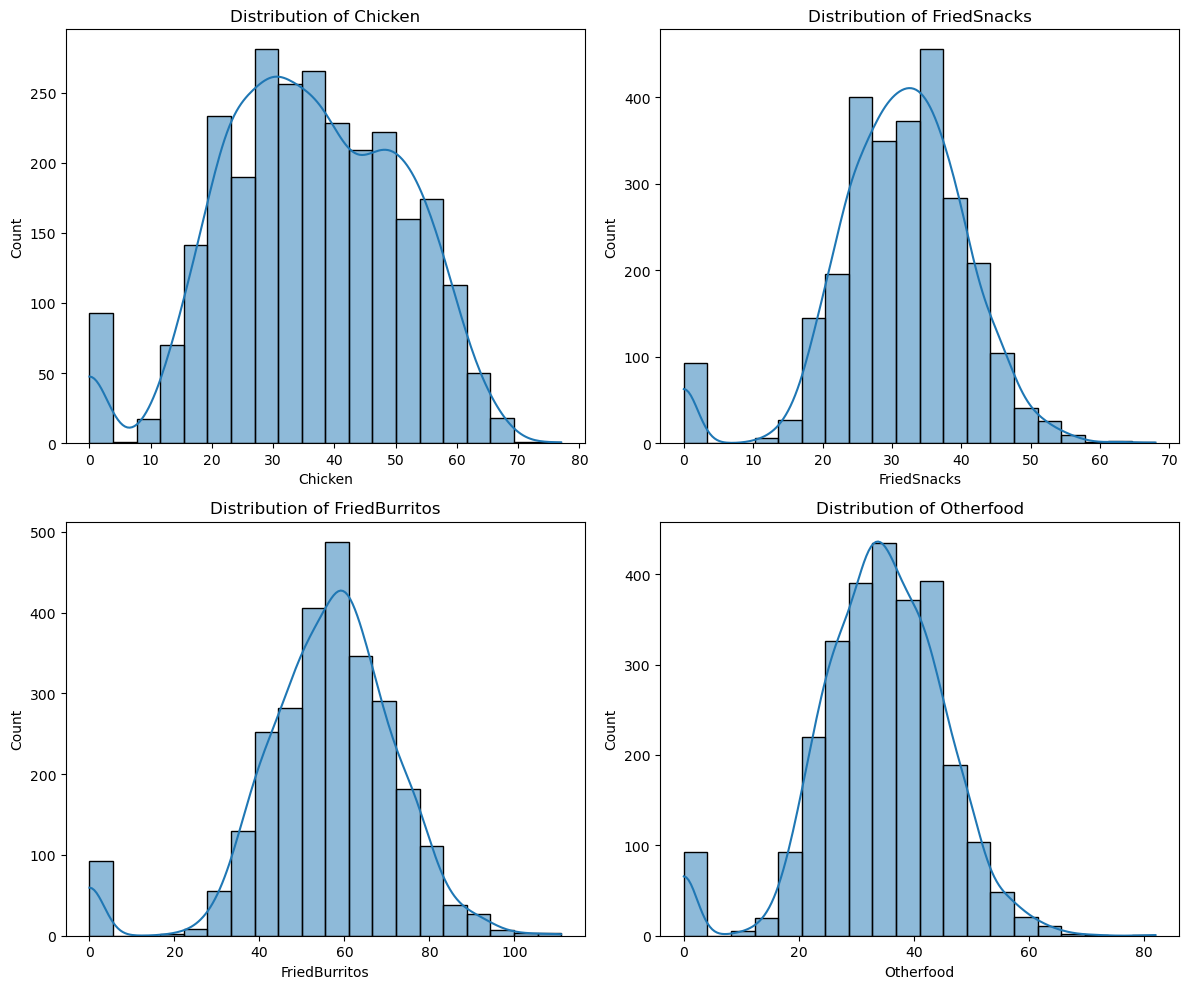

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distributions of the target variables
target_columns = ['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood']

# Plot histograms for target variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(target_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


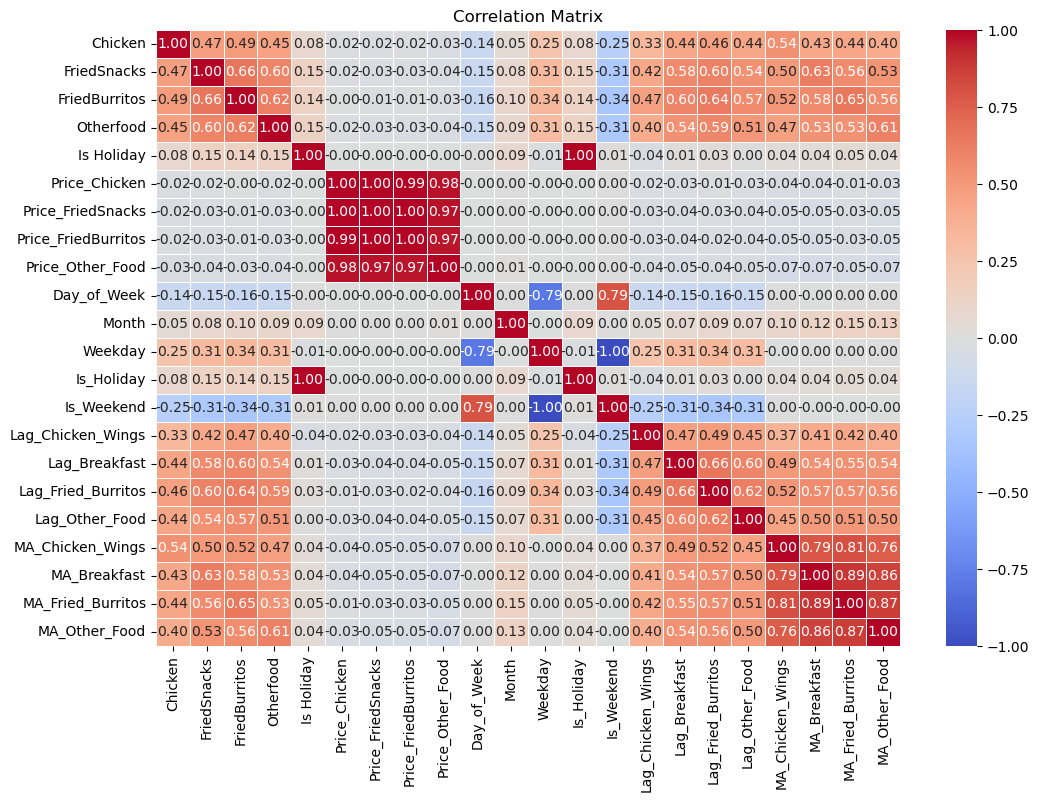

In [119]:
# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

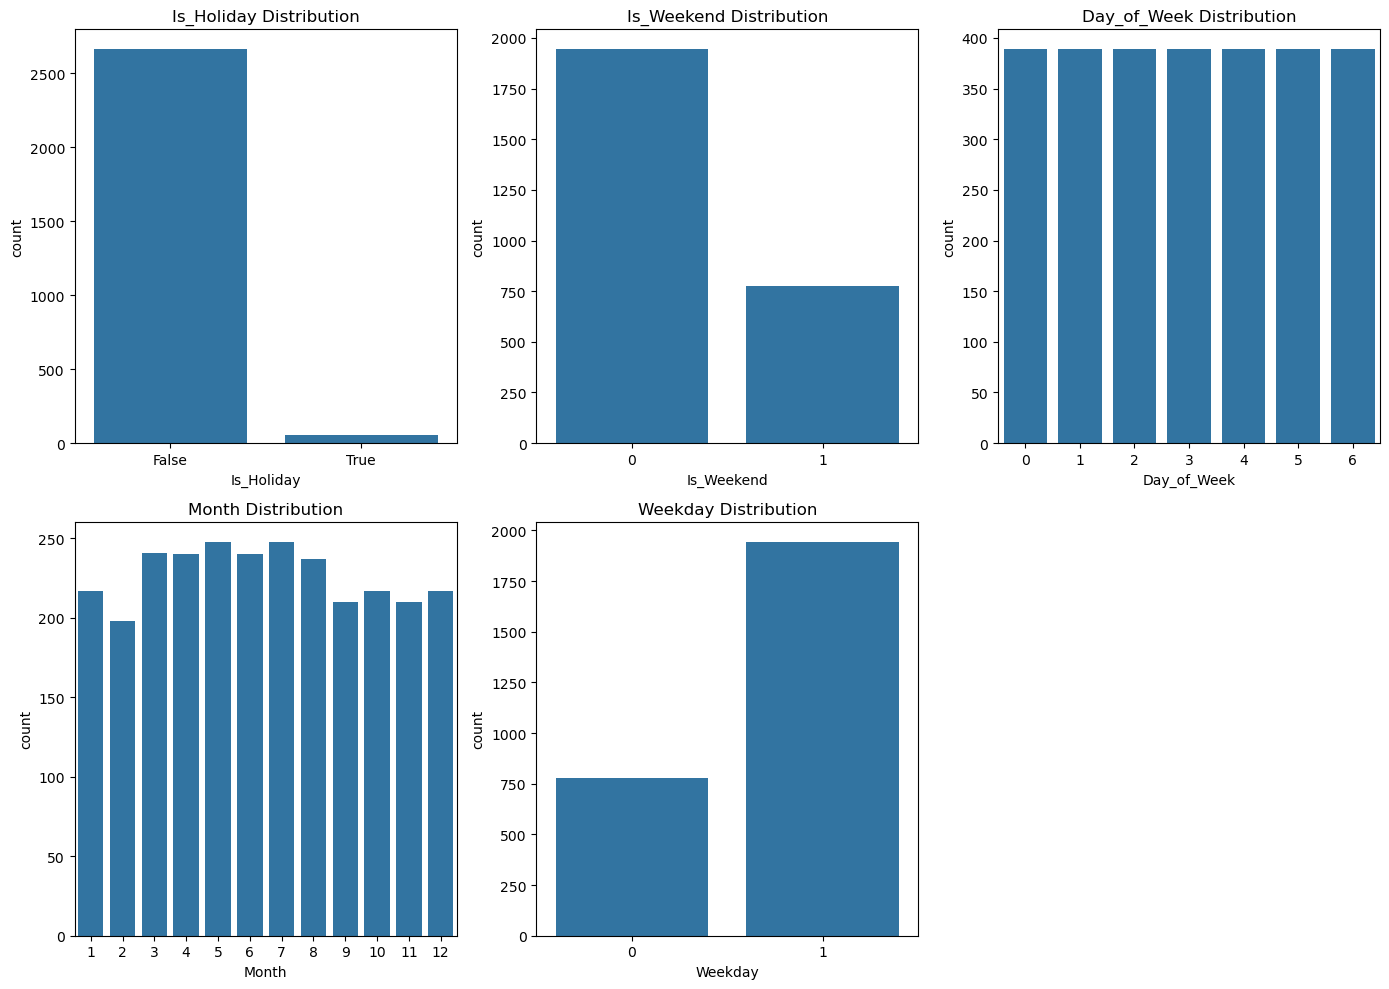

In [123]:
# Count plots for categorical variables
categorical_columns = ['Is_Holiday', 'Is_Weekend', 'Day_of_Week', 'Month', 'Weekday']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

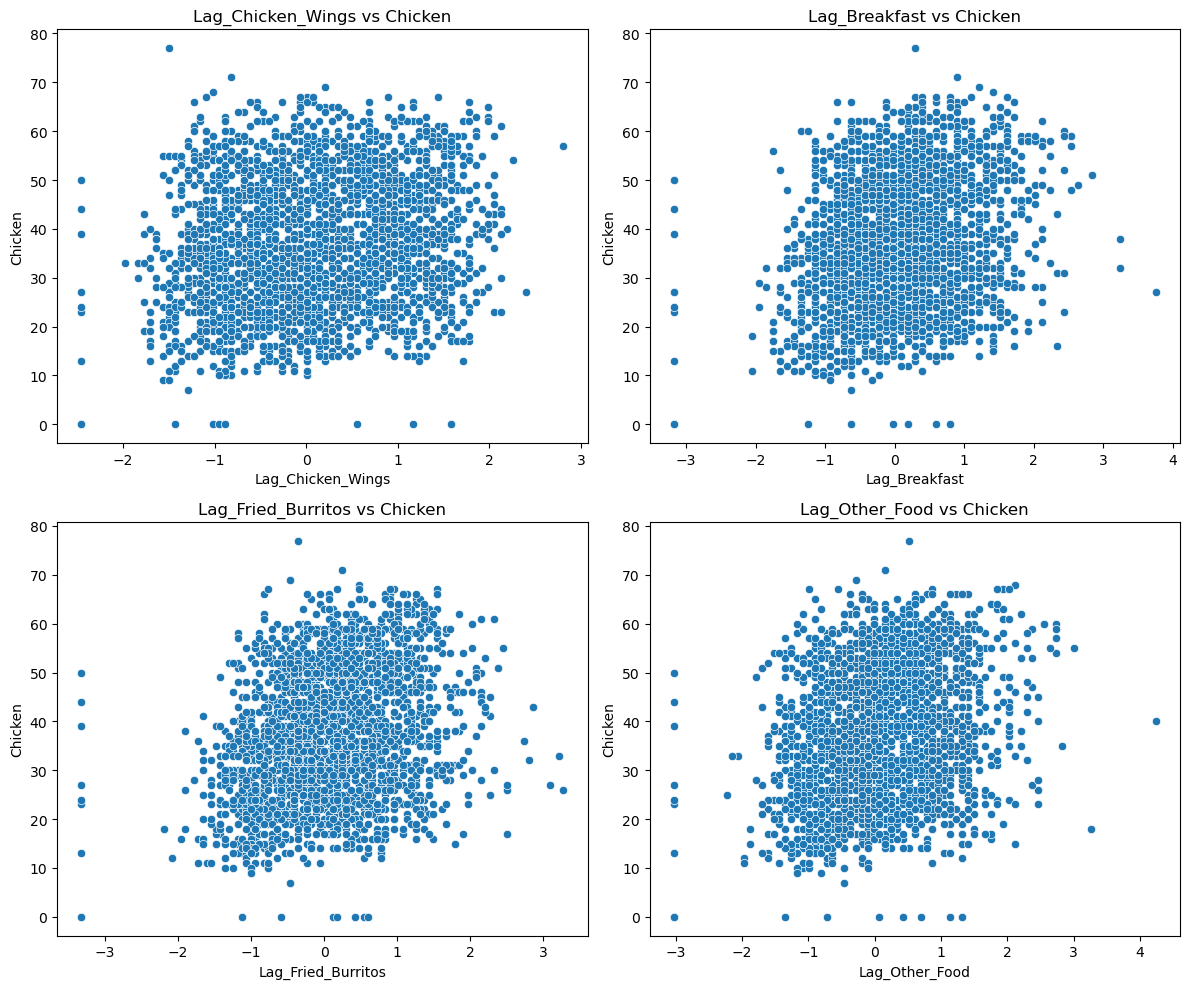

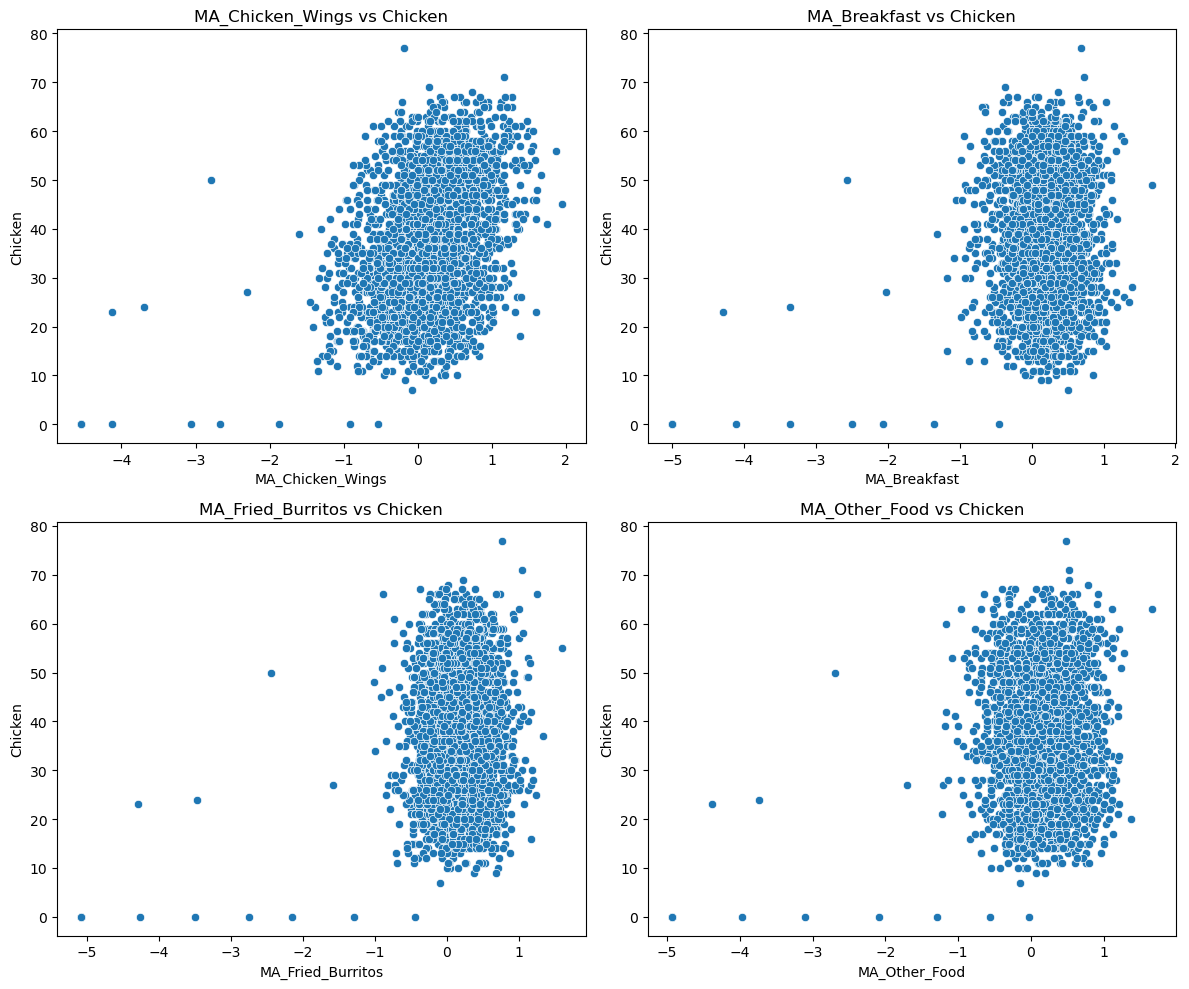

In [124]:
# Visualize Lag and Moving Averages with respect to targets
lag_columns = ['Lag_Chicken_Wings', 'Lag_Breakfast', 'Lag_Fried_Burritos', 'Lag_Other_Food']
ma_columns = ['MA_Chicken_Wings', 'MA_Breakfast', 'MA_Fried_Burritos', 'MA_Other_Food']

plt.figure(figsize=(12, 10))
for i, col in enumerate(lag_columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=col, y='Chicken')
    plt.title(f'{col} vs Chicken')

plt.tight_layout()
plt.show()

# Visualize Moving Averages with respect to targets
plt.figure(figsize=(12, 10))
for i, col in enumerate(ma_columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=col, y='Chicken')
    plt.title(f'{col} vs Chicken')

plt.tight_layout()
plt.show()


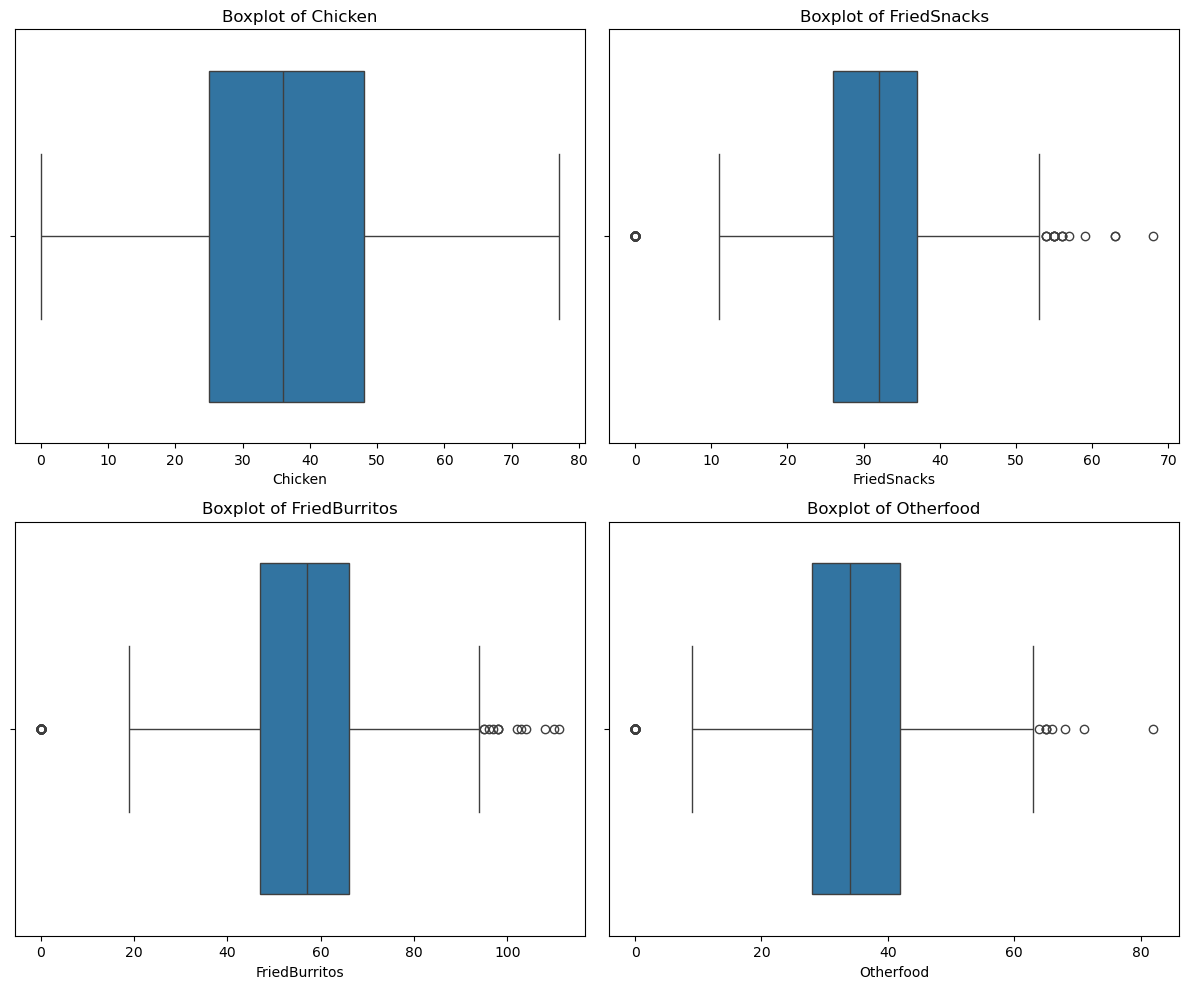

In [126]:
# Boxplots for the target variables to detect outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(target_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 8. Scale numerical features (for models like XGBoost or LSTM)
scaler = StandardScaler()

In [40]:
df.columns


Index(['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood', 'Is Holiday',
       'Price_Chicken', 'Price_FriedSnacks', 'Price_FriedBurritos',
       'Price_Other_Food', 'Day_of_Week', 'Month', 'Weekday', 'Is_Holiday',
       'Is_Weekend', 'Lag_Chicken_Wings', 'Lag_Breakfast',
       'Lag_Fried_Burritos', 'Lag_Other_Food', 'MA_Chicken_Wings',
       'MA_Breakfast', 'MA_Fried_Burritos', 'MA_Other_Food'],
      dtype='object')

In [41]:
# Features to scale (you can adjust based on your model needs)
columns_to_scale = ['Price_Chicken', 'Price_FriedSnacks', 
                    'Price_FriedBurritos', 'Price_Other_Food', 'Lag_Chicken_Wings', 
                    'Lag_Breakfast', 'Lag_Fried_Burritos', 'Lag_Other_Food', 'MA_Chicken_Wings', 
                    'MA_Breakfast', 'MA_Fried_Burritos', 'MA_Other_Food']

In [42]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2566292694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [43]:
# 9. Split the data into training and test sets
X = df.drop(['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood'], axis=1)
y = df[['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood']]  # Target variables

In [44]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


# Multi-output XGBoost
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
))

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb, multioutput='raw_values')
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost RMSE: {rmse_xgb}, MAE: {mae_xgb}")


XGBoost RMSE: [11.90588538  5.89057083  9.43858935  7.22221446], MAE: 6.9244968261193796


In [54]:
y_test

,Chicken,FriedSnacks,FriedBurritos,Otherfood
Date,,,,
2023-05-26,37,37,43,55
2023-05-27,13,29,53,37
2023-05-28,25,17,36,22
2023-05-29,35,32,62,47
2023-05-30,59,37,51,37
...,...,...,...,...
2024-08-16,62,48,60,52
2024-08-17,41,23,38,36
2024-08-18,19,21,39,24


In [55]:
y_pred_xgb



array([[49.880768, 29.062195, 60.324074, 38.02705 ],
       [53.515903, 33.023   , 65.84573 , 43.223034],
       [34.882748, 29.304873, 56.0003  , 38.932697],
       ...,
       [43.18757 , 28.191128, 60.18996 , 36.915016],
       [25.04976 , 20.996548, 37.997463, 27.17291 ],
       [43.77469 , 25.596685, 53.14465 , 34.12285 ]], dtype=float32)

In [56]:
y_pred_xgb.shape


(544, 4)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale features and targets (for LSTM, scaling is necessary)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Create sequences for LSTM (assuming sequence_length = 7)
def create_sequences(data_X, data_y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(data_X) - sequence_length):
        X_seq.append(data_X[i:i + sequence_length])
        y_seq.append(data_y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 7
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# Train-test split
split_index = int(X_seq.shape[0] * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dense(4)  # Output layer for 4 targets (multi-output)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predictions
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)

# Evaluation
mse_lstm = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_lstm, multioutput='raw_values')
mae_lstm = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM RMSE: {rmse_lstm}, MAE: {mae_lstm}")


Epoch 1/20


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0668 - val_loss: 0.0172
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174 - val_loss: 0.0185
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0156 - val_loss: 0.0148
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0154 - val_loss: 0.0138
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 9/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 10/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 11/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 12/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

In [57]:
y_pred_lstm

array([[44.290054, 40.622616, 69.972984, 42.343548],
       [37.140255, 33.115105, 57.296883, 35.239563],
       [27.20823 , 23.149181, 40.25482 , 25.886114],
       ...,
       [26.931171, 25.351841, 41.385143, 26.70866 ],
       [38.375603, 34.91643 , 58.977848, 37.033215],
       [37.893948, 34.46697 , 59.840946, 36.709084]], dtype=float32)

In [58]:
y_test

,Chicken,FriedSnacks,FriedBurritos,Otherfood
Date,,,,
2023-05-26,37,37,43,55
2023-05-27,13,29,53,37
2023-05-28,25,17,36,22
2023-05-29,35,32,62,47
2023-05-30,59,37,51,37
...,...,...,...,...
2024-08-16,62,48,60,52
2024-08-17,41,23,38,36
2024-08-18,19,21,39,24


In [47]:
print("Model Comparison:")
print(f"XGBoost RMSE (per target): {rmse_xgb}")
print(f"LSTM RMSE (per target): {rmse_lstm}")

# Best model based on average RMSE across targets
avg_rmse_xgb = np.mean(rmse_xgb)
avg_rmse_lstm = np.mean(rmse_lstm)

if avg_rmse_xgb < avg_rmse_lstm:
    print("XGBoost is the best model.")
else:
    print("LSTM is the best model.")


Model Comparison:
XGBoost RMSE (per target): [11.90588538  5.89057083  9.43858935  7.22221446]
LSTM RMSE (per target): [12.3740534   6.82773713 10.47337949  7.968758  ]
XGBoost is the best model.


In [59]:
# Slice predictions to match y_test length
y_pred_xgb = y_pred_xgb[:len(y_test)]
y_pred_lstm = y_pred_lstm[:len(y_test)]


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for XGBoost and LSTM
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

print(f"XGBoost MAPE: {mape_xgb}%")
print(f"LSTM MAPE: {mape_lstm}%")


XGBoost MAPE: 30.37483736866819%
LSTM MAPE: 22.286891169408364%


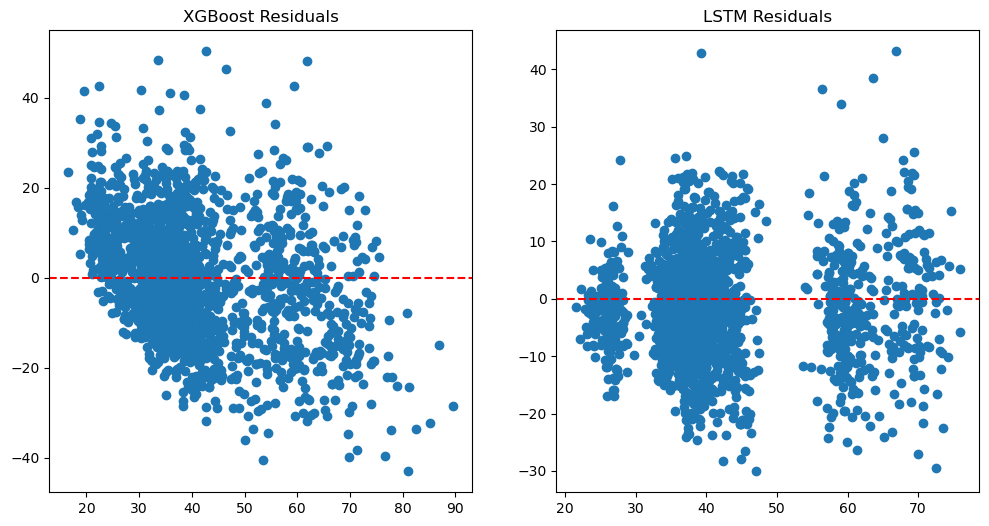

In [61]:
import matplotlib.pyplot as plt

# Residuals for XGBoost and LSTM
residuals_xgb = y_test - y_pred_xgb
residuals_lstm = y_test - y_pred_lstm

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_xgb, residuals_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('XGBoost Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_lstm, residuals_lstm)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('LSTM Residuals')

plt.show()


In [105]:
from sklearn.model_selection import TimeSeriesSplit

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


XGBoost RMSE: 9.258133018697201
XGBoost RMSE: 17.82805792887585
XGBoost RMSE: 8.916977685163804
XGBoost RMSE: 8.742251183329556
XGBoost RMSE: 8.815924690153071


In [106]:
summary = {
    "Model": ["XGBoost", "LSTM"],
    "RMSE": [rmse_xgb.mean(), rmse_lstm.mean()],
    "MAE": [mae_xgb.mean(), mae_lstm.mean()],
    "MAPE": [mape_xgb, mape_lstm],
}

results_df = pd.DataFrame(summary)
print(results_df)


     Model      RMSE       MAE       MAPE
0  XGBoost  8.614315  6.924497  30.374837
1     LSTM  9.410982  7.572233  22.286891


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you already have a trained XGBoost model (xgb_model)

# Step 1: Preprocessing function to convert columns to correct data types
def preprocess_data(data):
    # Convert 'Is_Holiday' to boolean (True/False)
    data['Is_Holiday'] = data['Is_Holiday'].astype(bool)

    # Convert price columns to numeric (in case any were objects)
    price_columns = ['Price_Chicken', 'Price_FriedSnacks', 'Price_FriedBurritos', 'Price_Other_Food']
    for col in price_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Ensure all columns are of the correct type
    data = data.apply(pd.to_numeric, errors='coerce')

    # Fill any missing values that may have been caused by type conversion
    data.fillna(0, inplace=True)

    return data

# Step 2: Update lag and moving average features after prediction
def update_lag_and_ma(data, predicted_values):
    # Update lag features with the predicted values
    data['Lag_Chicken_Wings'] = predicted_values[0]
    data['Lag_Breakfast'] = predicted_values[1]
    data['Lag_Fried_Burritos'] = predicted_values[2]
    data['Lag_Other_Food'] = predicted_values[3]
    
    # Update moving averages (simplified, may require a rolling window for your case)
    data['MA_Chicken_Wings'] = np.mean([data['Lag_Chicken_Wings']])  # Example, adjust as needed
    data['MA_Breakfast'] = np.mean([data['Lag_Breakfast']])
    data['MA_Fried_Burritos'] = np.mean([data['Lag_Fried_Burritos']])
    data['MA_Other_Food'] = np.mean([data['Lag_Other_Food']])
    
    return data

# Step 3: Initialize variables
n_days = 7  # Set the number of days you want to predict
future_predictions = []
current_data = df.iloc[-1:].copy()  # Start with the last row of your dataset

# Step 4: Loop to predict for the next n days
for day in range(n_days):
    # Preprocess the data for the current day to ensure correct data types
    current_data = preprocess_data(current_data)

    # Drop target columns to prepare features for prediction
    X_future = current_data.drop(['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood'], axis=1)

    # Predict next day's values
    y_future = xgb_model.predict(X_future)

    # Append predictions to the list
    future_predictions.append(y_future[0])

    # Update the features (lags, moving averages) with the predicted values
    current_data = update_lag_and_ma(current_data, y_future[0])

    # Update 'current_data' for the next day's prediction (using the new predicted values)
    new_row = current_data.copy()

    # Combine features and predictions to simulate the next day
    new_row.iloc[0, :] = np.append(X_future.values[0], y_future[0])
    current_data = new_row

# Step 5: Convert predictions into a DataFrame
future_df = pd.DataFrame(
    future_predictions, 
    columns=['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood']
)

# Step 6: Generate future dates (next n days)
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_days)

# Add the dates to the predictions
future_df['Date'] = future_dates
future_df.set_index('Date', inplace=True)



In [130]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you already have a trained XGBoost model (xgb_model)

# Step 1: Preprocessing function to convert columns to correct data types
def preprocess_data(data):
    # Convert 'Is_Holiday' to boolean (True/False)
    data['Is_Holiday'] = data['Is_Holiday'].astype(bool)

    # Convert price columns to numeric (in case any were objects)
    price_columns = ['Price_Chicken', 'Price_FriedSnacks', 'Price_FriedBurritos', 'Price_Other_Food']
    for col in price_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Ensure all columns are of the correct type
    data = data.apply(pd.to_numeric, errors='coerce')

    # Fill any missing values that may have been caused by type conversion
    data.fillna(0, inplace=True)

    return data

# Step 2: Update lag and moving average features after prediction
def update_lag_and_ma(data, predicted_values):
    # Update lag features with the predicted values
    data['Lag_Chicken_Wings'] = predicted_values[0]
    data['Lag_Breakfast'] = predicted_values[1]
    data['Lag_Fried_Burritos'] = predicted_values[2]
    data['Lag_Other_Food'] = predicted_values[3]
    
    # Update moving averages (simplified, may require a rolling window for your case)
    data['MA_Chicken_Wings'] = np.mean([data['Lag_Chicken_Wings']])  # Example, adjust as needed
    data['MA_Breakfast'] = np.mean([data['Lag_Breakfast']])
    data['MA_Fried_Burritos'] = np.mean([data['Lag_Fried_Burritos']])
    data['MA_Other_Food'] = np.mean([data['Lag_Other_Food']])
    
    return data

# Step 3: Initialize variables
n_days = 2  # Set the number of days you want to predict
future_predictions = []
current_data = df.iloc[-1:].copy()  # Start with the last row of your dataset

# Step 4: Loop to predict for the next n days
for day in range(n_days):
    # Preprocess the data for the current day to ensure correct data types
    current_data = preprocess_data(current_data)

    # Drop target columns to prepare features for prediction
    X_future = current_data.drop(['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood'], axis=1)

    # Predict next day's values
    y_future = xgb_model.predict(X_future)

    # Append predictions to the list
    future_predictions.append(y_future[0])

    # Update the features (lags, moving averages) with the predicted values
    current_data = update_lag_and_ma(current_data, y_future[0])

    # Update 'current_data' for the next day's prediction (using the new predicted values)
    new_row = current_data.copy()

    # Combine features and predictions to simulate the next day
    new_row.iloc[0, :] = np.append(X_future.values[0], y_future[0])
    current_data = new_row

# Step 5: Convert predictions into a DataFrame
future_df = pd.DataFrame(
    future_predictions, 
    columns=['Chicken', 'FriedSnacks', 'FriedBurritos', 'Otherfood']
)

# Step 6: Generate future dates (next n days)
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_days)

# Add the dates to the predictions
future_df['Date'] = future_dates
future_df.set_index('Date', inplace=True)

# Print the predictions
print(future_df)

              Chicken  FriedSnacks  FriedBurritos  Otherfood
Date                                                        
2024-08-21  40.107643    31.758524      53.641918  34.603230
2024-08-22  55.000347    40.643997      58.810070  37.362503


C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2408609570.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_row.iloc[0, :] = np.append(X_future.values[0], y_future[0])
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2408609570.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.173000521325178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_row.iloc[0, :] = np.append(X_future.values[0], y_future[0])
C:\Users\harsh\AppData\Local\Temp\ipykernel_20232\2408609570.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1183233945075022' has dtype incompatible with int64, please explicitly cast

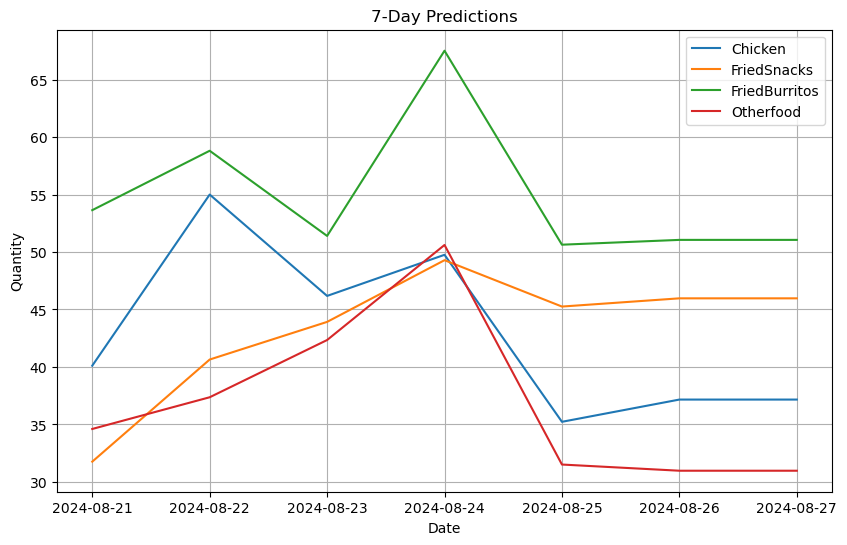

              Chicken  FriedSnacks  FriedBurritos  Otherfood
Date                                                        
2024-08-21  40.107643    31.758524      53.641918  34.603230
2024-08-22  55.000347    40.643997      58.810070  37.362503
2024-08-23  46.179920    43.919964      51.399410  42.341339
2024-08-24  49.757332    49.288071      67.514191  50.611992
2024-08-25  35.226627    45.254295      50.636883  31.508507
2024-08-26  37.161419    45.969299      51.055069  30.970245
2024-08-27  37.161419    45.969299      51.055069  30.970245


In [129]:
# Step 7: Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(future_df.index, future_df['Chicken'], label='Chicken')
plt.plot(future_df.index, future_df['FriedSnacks'], label='FriedSnacks')
plt.plot(future_df.index, future_df['FriedBurritos'], label='FriedBurritos')
plt.plot(future_df.index, future_df['Otherfood'], label='Otherfood')
plt.legend()
plt.title(f'{n_days}-Day Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

# Print the predictions
print(future_df)